In [12]:
import warnings # Omitir mensajes de advertencia
warnings.filterwarnings("ignore")

In [13]:
# Trabajamos en colab:
from google.colab import drive
drive.mount('/content/drive/')

import os

path = '/content/drive/MyDrive/Colab Notebooks/Estadistica_Meteo/' # Directorio de trabajo

os.chdir(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

# MATRIZ HEATMAPS DE CORRELACION

In [15]:
nino = pd.read_excel(path + 'nino.xlsx', 'NINO')
nino

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3
0,1960,1,24.23,-0.33,25.31,-0.34,27.62,-0.70,26.27,-0.28
1,1960,2,25.68,-0.42,25.93,-0.47,27.44,-0.75,26.29,-0.46
2,1960,3,26.24,-0.25,26.87,-0.33,27.75,-0.57,26.98,-0.30
3,1960,4,24.43,-1.11,27.15,-0.43,28.01,-0.62,27.49,-0.33
4,1960,5,23.33,-1.09,26.71,-0.54,28.42,-0.50,27.68,-0.25
...,...,...,...,...,...,...,...,...,...,...
727,2020,8,19.96,-1.05,24.50,-0.61,28.47,-0.31,26.26,-0.59
728,2020,9,19.50,-1.22,23.91,-0.99,28.21,-0.55,25.89,-0.83
729,2020,10,20.42,-0.60,23.88,-1.10,27.96,-0.80,25.46,-1.26
730,2020,11,21.07,-0.58,23.90,-1.21,27.80,-0.90,25.28,-1.42


In [16]:
time = pd.date_range('1960-01-01', '2020-12-31', freq = 'M')
nino['time'] = time
nino_df = nino.set_index('time')
nino_df.head()

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3
time,,,,,,,,,,
1960-01-31,1960,1,24.23,-0.33,25.31,-0.34,27.62,-0.70,26.27,-0.28
1960-02-29,1960,2,25.68,-0.42,25.93,-0.47,27.44,-0.75,26.29,-0.46
1960-03-31,1960,3,26.24,-0.25,26.87,-0.33,27.75,-0.57,26.98,-0.30
1960-04-30,1960,4,24.43,-1.11,27.15,-0.43,28.01,-0.62,27.49,-0.33
1960-05-31,1960,5,23.33,-1.09,26.71,-0.54,28.42,-0.50,27.68,-0.25


In [17]:
# Solo para los meses de enero:
nino_df_ene = nino_df.loc[nino_df.index.month == 1]
nino_ene = nino_df_ene[['ANOM','ANOM.1','ANOM.2','ANOM.3']]
# ANOM: Niño 1+2, ANOM.1: NIÑO 3, ANOM.2: NIÑO 4 y ANOM.3: NIÑO 3.4
nino_ene.reset_index(drop = True, inplace = True)
nino_ene.head()

,ANOM,ANOM.1,ANOM.2,ANOM.3
0,-0.33,-0.34,-0.70,-0.28
1,-0.08,-0.55,-0.35,-0.31
2,-0.74,-0.57,-0.66,-0.59
3,-0.85,-0.81,-0.86,-0.78
4,-0.65,0.36,0.09,0.79


In [18]:
covarianza = nino_ene.cov()
corr_pearson = nino_ene.corr(method=lambda x, y: pearsonr(x, y)[0])
corr_TauKendall = nino_ene.corr(method=lambda x, y: kendalltau(x, y)[0])

print('--------------------------------------------')
print('Matriz de Covarianza:\n')
print(covarianza)
print('--------------------------------------------')
print('Matriz de Correlación Pearson:\n')
print(corr_pearson)
print('--------------------------------------------')
print('Matriz de Correlación Tau-Kendall:\n')
print(corr_TauKendall)

--------------------------------------------
Matriz de Covarianza:

            ANOM    ANOM.1    ANOM.2    ANOM.3
ANOM    0.825999  0.856376  0.408259  0.767271
ANOM.1  0.856376  1.177675  0.700323  1.172162
ANOM.2  0.408259  0.700323  0.659904  0.810671
ANOM.3  0.767271  1.172162  0.810671  1.248094
--------------------------------------------
Matriz de Correlación Pearson:

            ANOM    ANOM.1    ANOM.2    ANOM.3
ANOM    1.000000  0.868284  0.552976  0.755675
ANOM.1  0.868284  1.000000  0.794412  0.966832
ANOM.2  0.552976  0.794412  1.000000  0.893265
ANOM.3  0.755675  0.966832  0.893265  1.000000
--------------------------------------------
Matriz de Correlación Tau-Kendall:

            ANOM    ANOM.1    ANOM.2    ANOM.3
ANOM    1.000000  0.628226  0.442984  0.536479
ANOM.1  0.628226  1.000000  0.650960  0.853071
ANOM.2  0.442984  0.650960  1.000000  0.742200
ANOM.3  0.536479  0.853071  0.742200  1.000000


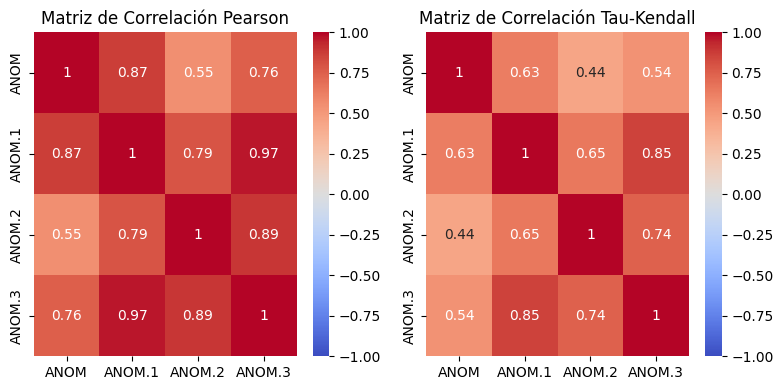

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
# Gráfico de correlación de Pearson
sns.heatmap(corr_pearson, annot=True, vmin=-1, vmax=1, cmap='coolwarm', ax=axs[0])
axs[0].set_title('Matriz de Correlación Pearson')

# Gráfico de correlación de Tau-Kendall
sns.heatmap(corr_TauKendall, annot=True, vmin=-1, vmax=1, cmap='coolwarm', ax=axs[1])
axs[1].set_title('Matriz de Correlación Tau-Kendall')

# Ajusta el espaciado entre los subplots
plt.tight_layout()
plt.show()

# MATRIZ HEATMAPS DE P-VALUES

In [20]:
# Calculando los p-values: [0]: Coef. correlación, [1]: p-values
pvals_pearson = nino_ene.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(len(nino_ene.columns))
pvals_spearman = nino_ene.corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(len(nino_ene.columns))
pvals_TauKendall = nino_ene.corr(method=lambda x, y: kendalltau(x, y)[1]) - np.eye(len(nino_ene.columns))

In [21]:
print('---------------------------')
print('P-VALUES PEARSON\n')
print(pvals_pearson)
print('---------------------------')
print('P-VALUES SPEARMAN\n')
print(pvals_spearman)
print('---------------------------')
print('P-VALUES Tau-Kendall\n')
print(pvals_TauKendall)

---------------------------
P-VALUES PEARSON

                ANOM        ANOM.1        ANOM.2        ANOM.3
ANOM    0.000000e+00  1.290075e-19  3.812211e-06  1.937674e-12
ANOM.1  1.290075e-19  0.000000e+00  2.161313e-14  1.137837e-36
ANOM.2  3.812211e-06  2.161313e-14  0.000000e+00  3.755311e-22
ANOM.3  1.937674e-12  1.137837e-36  3.755311e-22  0.000000e+00
---------------------------
P-VALUES SPEARMAN

                ANOM        ANOM.1        ANOM.2        ANOM.3
ANOM    0.000000e+00  1.777541e-15  5.172082e-08  3.138777e-11
ANOM.1  1.777541e-15  0.000000e+00  4.351048e-18  1.095617e-35
ANOM.2  5.172082e-08  4.351048e-18  0.000000e+00  2.136221e-23
ANOM.3  3.138777e-11  1.095617e-35  2.136221e-23  0.000000e+00
---------------------------
P-VALUES Tau-Kendall

                ANOM        ANOM.1        ANOM.2        ANOM.3
ANOM    0.000000e+00  1.065522e-12  4.919847e-07  1.144615e-09
ANOM.1  1.065522e-12  0.000000e+00  1.421030e-13  3.484313e-22
ANOM.2  4.919847e-07  1.421030e-13  0.

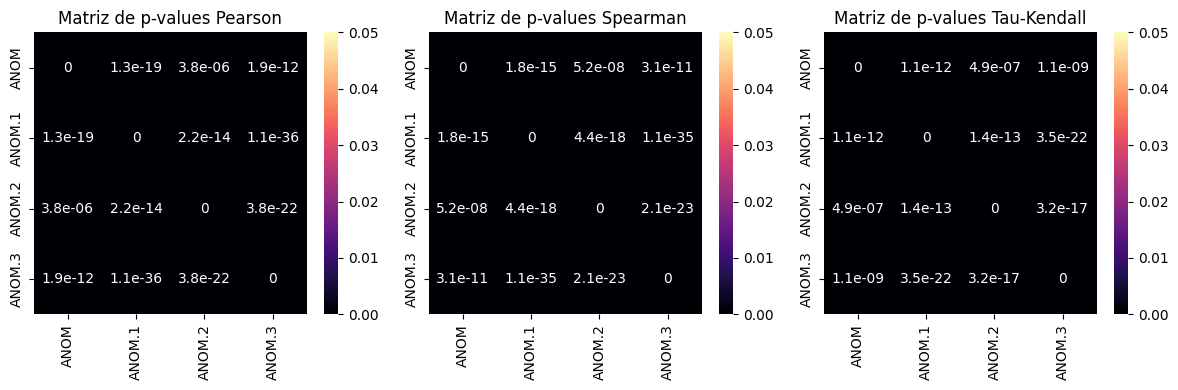

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
# Gráfico de p-values de Pearson
sns.heatmap(pvals_pearson, annot=True, vmin = 0, vmax = 0.05, cmap='magma', ax=axs[0])
axs[0].set_title('Matriz de p-values Pearson')

# Gráfico de p-values de Spearman
sns.heatmap(pvals_spearman, annot=True, vmin = 0, vmax = 0.05, cmap='magma', ax=axs[1])
axs[1].set_title('Matriz de p-values Spearman')

# Gráfico de p-values de Tau-Kendall
sns.heatmap(pvals_TauKendall, annot=True, vmin = 0, vmax = 0.05, cmap='magma', ax=axs[2])
axs[2].set_title('Matriz de p-values Tau-Kendall')

# Ajusta el espaciado entre los subplots
plt.tight_layout()
plt.show()